In [ ]:
%matplotlib inline

# pandasのライブラリ
import pandas as pd
# 機械学習ライブラリ
import sklearn
import numpy as np

# csvを読み込む
mush_df = pd.read_csv('mushrooms.csv')
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
# 欠損値の確認をする
mush_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# 相関を調べるために文字データを数値データに変更→ラベルエンコーディングを行う
# 【参考】データサイエンスのテキストP216 カテゴリ変数のエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# class列のラベルエンコーディング
encoded = le.fit_transform(mush_df['class'].values)
mush_df['class'] = encoded
# できてるか確認
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,0,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,0,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,1,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,0,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
# データのOneHotエンコーディングを行う
mush_df = pd.get_dummies(mush_df)
mush_df.head()

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_groovesmooth,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 相関を調べる
# 【参考】データサイエンスのテキストP173 相関係数
corrdata = mush_df.corr().abs()
corrdata

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_groovesmooth,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
class,1.000000,0.182567,0.023007,0.026886,0.018526,0.163565,0.060664,0.195415,0.023007,0.088677,...,0.159572,0.443722,0.107055,0.165004,0.155150,0.138627,0.323346,0.112078,0.150087,0.126123
cap-shape_bell,0.182567,1.000000,0.005387,0.219564,0.193260,0.081769,0.015264,0.091638,0.018820,0.027947,...,0.158702,0.168381,0.120154,0.149151,0.010113,0.374316,0.095178,0.052871,0.037764,0.182037
cap-shape_conical,0.023007,0.005387,1.000000,0.020077,0.017672,0.007477,0.001396,0.014032,0.249631,0.015893,...,0.009456,0.022075,0.011469,0.013306,0.065707,0.004286,0.008985,0.004835,0.003453,0.017653
cap-shape_convex,0.026886,0.219564,0.020077,1.000000,0.720235,0.304733,0.056884,0.063511,0.020077,0.019137,...,0.059264,0.060421,0.044626,0.023197,0.096639,0.004529,0.029042,0.002845,0.036493,0.071773
cap-shape_flat,0.018526,0.193260,0.017672,0.720235,1.000000,0.268226,0.050070,0.064801,0.006285,0.029076,...,0.075804,0.034625,0.111346,0.017982,0.052326,0.129312,0.021891,0.030636,0.017450,0.074986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_meadows,0.138627,0.374316,0.004286,0.004529,0.129312,0.065047,0.012142,0.122077,0.004286,0.039697,...,0.152473,0.144434,0.099772,0.115762,0.065222,1.000000,0.078170,0.042059,0.030041,0.153579
habitat_paths,0.323346,0.095178,0.008985,0.029042,0.021891,0.090538,0.025458,0.086727,0.008985,0.117915,...,0.125366,0.169228,0.040714,0.242715,0.136749,0.078170,1.000000,0.088184,0.062986,0.322005
habitat_urban,0.112078,0.052871,0.004835,0.002845,0.030636,0.073380,0.288697,0.011913,0.004835,0.100248,...,0.130450,0.001180,0.042888,0.130592,0.073577,0.042059,0.088184,1.000000,0.033889,0.173254
habitat_waste,0.150087,0.037764,0.003453,0.036493,0.017450,0.119003,0.009784,0.098365,0.003453,0.031986,...,0.066282,0.154742,0.080392,0.093276,0.052553,0.030041,0.062986,0.033889,1.000000,0.123748


In [ ]:
# 「class」列にフォーカスしてわかりやすく相関を表示
corr_y = pd.DataFrame({'列':corrdata.columns, '相関':corrdata['class']}, index=None)
corr_y = corr_y.reset_index(drop=True)
# 相関列の昇順、グラデーションを付けて表示
corr_y.sort_values(by='相関', ascending=False).style.background_gradient()

,列,相関
0,class,1.000000
29,odor_none,0.785557
27,odor_foul,0.623842
59,stalk-surface-above-ring_silky,0.587658
63,stalk-surface-below-ring_silky,0.573524
95,ring-type_pendant,0.540469
37,gill-size_narrow,0.540024
36,gill-size_broad,0.540024
40,gill-color_buff,0.538808
22,bruises_yes,0.501530


In [ ]:
# 相関係数より、「odor_none	」、「odor_foul」、「stalk-surface-above-ring_silky」、「stalk-surface-below-ring_silky	」、「ring-type_pendant」、「gill-size_narrow」、「gill-size_broad」、「gill-color_buff」、「bruises_yes」、「bruises_no」を入力データにする
input_df = mush_df[['odor_none','odor_foul','stalk-surface-above-ring_silky','stalk-surface-below-ring_silky','ring-type_pendant','gill-size_narrow','gill-size_broad','gill-color_buff','bruises_yes','bruises_no']]

input_df.head()

,odor_none,odor_foul,stalk-surface-above-ring_silky,stalk-surface-below-ring_silky,ring-type_pendant,gill-size_narrow,gill-size_broad,gill-color_buff,bruises_yes,bruises_no
0,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,1,0,1,0,1,0
2,0,0,0,0,1,0,1,0,1,0
3,0,0,0,0,1,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1


In [ ]:
# 「class」（目的変数）をone-hotエンコーディングする
correct_df = pd.get_dummies(mush_df['class'])
correct_df.head()

,0,1
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
# 列数と行数を求める
print('入力データの行、列数',input_df.shape)
print('正解データの行、列数',correct_df.shape)

入力データの行、列数 (8124, 10)
正解データの行、列数 (8124, 2)


In [ ]:
# numpyの行列データに変換する
input_data = np.array(input_df)
correct_data = np.array(correct_df)

Epoch:0/100 Error_train:0.6991951839674317 Error_test:0.7001109471014519
Epoch:10/100 Error_train:0.07750160022476378 Error_test:0.06225945892579123
Epoch:20/100 Error_train:0.07408313006910937 Error_test:0.054781109878773035
Epoch:30/100 Error_train:0.07281898758660107 Error_test:0.05445243740340738
Epoch:40/100 Error_train:0.07386186923604182 Error_test:0.05857091186917199
Epoch:50/100 Error_train:0.07280404782791523 Error_test:0.05408496845353585
Epoch:60/100 Error_train:0.07355489668014754 Error_test:0.05715150445634863
Epoch:70/100 Error_train:0.07325509211831913 Error_test:0.05523365420097257
Epoch:80/100 Error_train:0.0727275639936529 Error_test:0.055664735385460955
Epoch:90/100 Error_train:0.07227725070660003 Error_test:0.054992681855915285


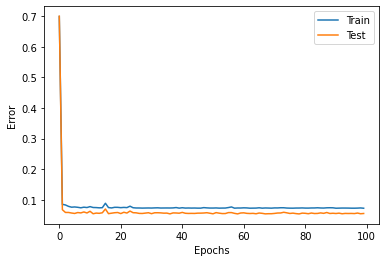

Accuracy Train: 97.48892171344166% Accuracy Test: 98.52289512555392%


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# サンプル数（薬データのデータ数）の代入
n_data = len(correct_data)  

# -- 入力データを標準化する --
ave_input = np.average(input_data, axis=0)
std_input = np.std(input_data, axis=0)
input_data = (input_data - ave_input) / std_input

# 正解をone-hot表現にする --
# ここはすでに実施済み
# correct_data = np.zeros((n_data,5))
# for i in range(n_data):
#     correct_data[i, correct[i]] = 1.0

# 訓練データとテストデータ --
# 200件中3で割り切れるデータをテストデータに、割り切れないデータを訓練データにしてみる
# つまり、33%をテストデータに設定しています！
index = np.arange(n_data)
index_train = index[index%3 != 0]
index_test = index[index%3 == 0]

input_train = input_data[index_train, :]  # 訓練 入力
correct_train = correct_data[index_train, :]  # 訓練 正解
input_test = input_data[index_test, :]  # テスト 入力
correct_test = correct_data[index_test, :]  # テスト 正解

n_train = input_train.shape[0]  # 訓練データのサンプル数
n_test = input_test.shape[0]  # テストデータのサンプル数

# 各設定値 --
n_in = 10  # 入力層のニューロン数
n_mid = 30  # 中間層のニューロン数
n_out = 2  # 出力層のニューロン数

# ハイパーパラメータの設定
wb_width = 0.1  # 重みとバイアスの広がり具合
eta = 0.01  # 学習係数
epoch = 100
batch_size = 8
interval = 10  # 経過の表示間隔

# -- 各層の継承元 --
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 中間層 --
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) # ReLU
    
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1)  # ReLUの微分

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

# -- 出力層 --
class OutputLayer(BaseLayer):     
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)  # ソフトマックス関数

    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 
        
# -- 各層の初期化 --
# インスタンス化してる
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 順伝播 --
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)

# -- 逆伝播 --
def backpropagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)

# -- 重みとバイアスの更新 --
def uppdate_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)

# -- 誤差を計算 --
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size  # 交差エントロピー誤差


# -- 誤差の記録用 --
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

# -- 学習と経過の記録 --
n_batch = n_train // batch_size  # 1エポックあたりのバッチ数
for i in range(epoch):

    # -- 誤差の計測 --  
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    # -- 誤差の記録 -- 
    test_error_x.append(i)
    test_error_y.append(error_test) 
    train_error_x.append(i)
    train_error_y.append(error_train) 
    
    # -- 経過の表示 -- 
    if i%interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error_train:" + str(error_train),
              "Error_test:" + str(error_test))

    # -- 学習 -- 
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        backpropagation(t)
        
        # 重みとバイアスの更新
        uppdate_wb()

        
# -- 誤差の記録をグラフ表示 -- 
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

# -- 正解率の測定 -- 
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
      "Accuracy Test:", str(count_test/n_test*100) + "%")